## Project II - Programming for Data Analysis
****
### Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project
- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency
****

#### Dataset Information

For this project I am using the original Wisconsin Breast Cancer dataset imported from UCI machine learning repository. This is a multivariate classification dataset, which records the measurements for breast cancer cases. There are two classes; benign and malignant, denoted by numbers 2 and 4 respectively. The malignant class of this dataset is considered as outliers, while points in the benign class are considered inliers. There are 699 samples that have 11 attributes with 19 missing values. The 9 other attributes are ranged from 1 to 10. Pathologists assigned these numbers based on their characteristics. See tables below for initial information on the dataset.

There has been numerous research works done on this dataset with the aim to be able to predict the liklihood of breast cancer in patients.   

In [3]:
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
# importing the Wisconsin Breast Cancer dataset from UCI Machine Learning Repository using Pandas
# note we are missing column names so I need to add these in using names function and taking names from attributes section on UCI website
# naming dataset "wbc" using initials of the dataset

wbc = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                 names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])

In [4]:
wbc.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [64]:
wbc.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [6]:
# to determine no. of rows and no. of columns
wbc.shape

(699, 11)

In [7]:
wbc.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot:>

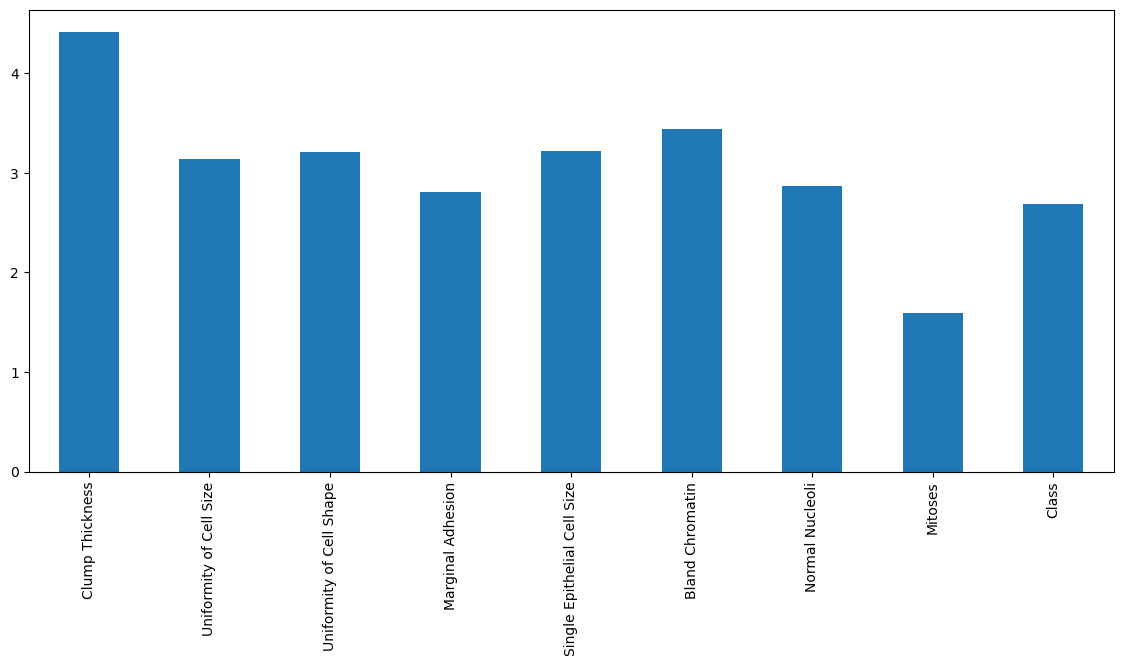

In [8]:
#drop first column as it contains sample numbers and not attributes
wbc.drop(columns = wbc.columns[0], axis = 1, inplace= True)
data_mean = wbc.describe().loc['mean']
data_mean.plot(kind='bar', figsize=(14,6))


****
#### Classifiers

Breast cancer is an unfortunately very common disease with ongoing research being done with the aim to amend the outcome for patients from a terminal illness to a treatable illness.

Current statistics in Ireland:
- 1 in 9 women will develop breast cancer in the course of their lifetime.
- Incidence of male breast cancer is 1 in 1000.
- There are 3,700 new cases of breast cancer diagnosed each year.
- 23% of women are diagnosed between the ages of 20-50 years.
- 34% of women are diagnosed between the ages of 50-69 years.
- 36% of women are diagnosed over the age of 70 years.
- Only 5%-10% of breast cancer cases are hereditary.

 __[Breast Cancer Ireland](https://www.breastcancerireland.com/education-awareness/facts-and-figures/)__


Using machine learning methods is an effective way to classify data, and interest in the application of machine learning to the design, conduct, and analysis of clinical trials has grown. Machine learning has the potential to help improve the success and efficiency of clinical trials. __[The role of machine learning in clinical research: transforming the future of evidence generation](https://trialsjournal.biomedcentral.com/articles/10.1186/s13063-021-05489-x)__

In our dataset we have missing values and machine learning can be used in several different ways to address the problem of missing data but it has more value in the collection of new data sets where it can ensure a reduction in errors when collecting the data during research. We will remove the missing values for the purpose of this project.

A very effective use of machine learning is to generate risk predictions in retrospective datasets that can be considered in future research and a big part of that is classification. 

Checking the data set for any null values is important as machine learning algorithms cannot handle null values. We have to either eliminate the records with null values or replace them with the mean/median of the other values. 

We can see below each of the variables are printed with number of null values. This data set has no null values denoted by the zeroes.

In [11]:
#checking for null values

wbc.isnull().sum()


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [75]:
# we know there are missing values and we want to avoid Not a Number (NaN) errors 
# so I will remove the rows with a non numeric value




****
#### Classifiers - Literature Review

Papers
- An Evaluation of the Wisconsin Breast Cancer Dataset using Ensemble Classifiers and RFE Feature Selection Technique
- Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection

In both papers only two classifiers are compared using the Wisconsin Breast Cancer dataset. In the first the performance of the classifiers; random forest and extreme gradient boosting are compared. The second paper focusses on the Bayesian classiﬁer called Bayesian Networks and the J48. From the variables in the data set the aim is to determine whether or not the patient has breast cancer. The main objective of the research is to assess the accuracy of the classifiers with respect to their efficiency and effectiveness in classifying the dataset.

The random forest is a classification algorithm consisting of many decisions trees. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.
_[Random Forest](https://en.wikipedia.org/wiki/Random_forest)_

Extreme Gradient Boost classifier works by building a succession of weak decision tree learners, with each new tree trying to reduce the error of the previous one. Recent studies by researchers has been able to highlight that some classifiers have more success rate in performing classification tasks in comparison to other classifiers. The extreme gradient boost classifier is categorized as one of such classifiers. This classifier is designed to increase the computational speed and efficiency of the machine used in performing the experiment.  

A Bayesian network is a compact, flexible and interpretable representation of a joint probability distribution. Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. A Bayesian network is learned from data. _[Bayesian Network](https://www.uib.no/en/rg/ml/119695/bayesian-networks#:~:text=A%20Bayesian%20network%20is%20a,network%20is%20learned%20from%20data.)_

J48 algorithm is one of the most widely used machine learning algorithms to examine the data categorically and continuously. The C4.5 algorithm (J48) is mostly used among many fields for classifying data for example interpreting the clinical data e.g. interpreting the clinical data for the diagnosis of coronary heart disease, classifying E-governance data, etc. _[J48](https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e)_

The first part of the research is to discuss how the data set was prepared to ensure the data set was in the correct format to buikd the classifiers e.g. the first column was excluded as above and the records with missing values removed. 
The following issues with the dataset were observed:
- missing data
- small dataset size
- various ranges of data values
- unbalanced data
- skewed data

The data set was then split 80:20 where 80% was the training set and 20% was the test set. The research discusses how they modelled the training data and evaluated it against the test data to predict the outcome. All of the data sets variables were used. They were able to demonstrate that the extreme gradient boost classifier performed the classification task better than random forest classifier. Extreme gradient boost had the highest classification accuracy with 98.53% against 97.07% for random forest.

The second paper performed the same tests on both their classifiers for comparison. The Bayesian Networks classifier was good with imbalanced data (97.80% oaccuracy), but it does not deal with missing values. The J48 was found to be a less accurate classiﬁer, with a higher rate of false-negatives (96.05% of accuracy). 

Both papers investigated the use of two ensemble machine learning classifiers for cancer diagnosis on the Wisconsin Breast Cancer Dataset. It compared the classifiers to find the best classification accuracy. The research was limited to just two machine learning classifiers and would have benefitted by including other classifiers for broader comparison.

****

#### Statistical Analysis

The dependent variable in the data set is whether the patient has a benign or malignant tumor. 

<AxesSubplot:>

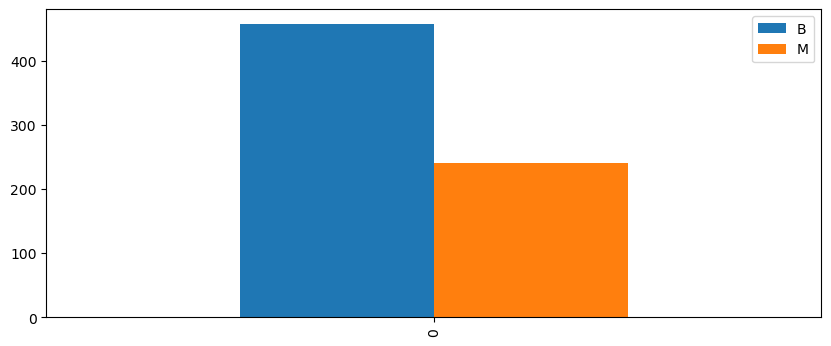

In [10]:
#to show the number of samples that are benign or malignant

data_B = wbc[wbc['Class'] == 2]
data_M = wbc[wbc['Class'] == 4]
B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

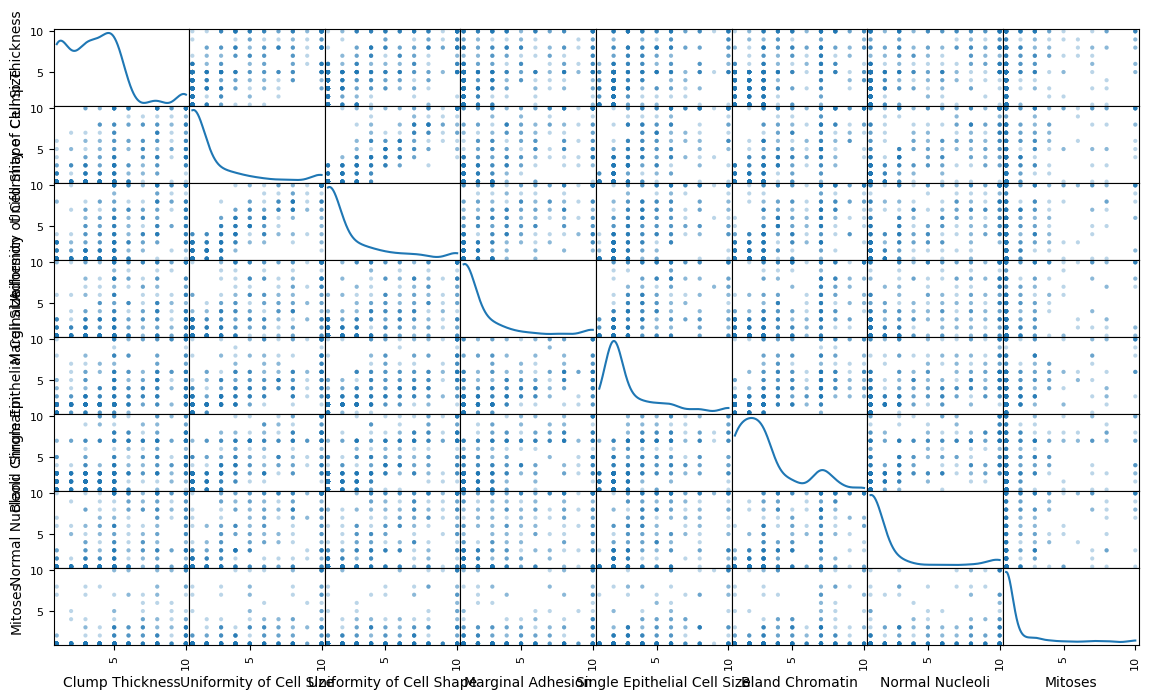

In [11]:
#to check for skewness

diagnosis = wbc['Class']
features = wbc.drop(['Class'], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
SVM: nan (nan)


C:\Users\daith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\daith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\daith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\daith\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\daith\anaconda3\

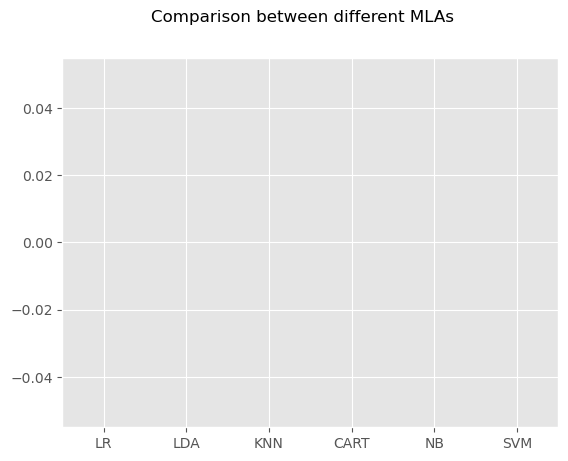

In [54]:
#Comparing Machine Learning Algorithms (MLAs) are important to come out with the best-suited algorithm for a particular problem.

#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#drop first column
new = wbc.drop(columns = wbc.columns[0])

# Creating variables for analysis
x=new.iloc[:,:-1]
y=new.iloc[:,:-1]

# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=None)

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [65]:
# Creating variables for analysis
new = wbc.drop(columns = wbc.columns[0])
display(new.to_string())

'     Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class\n0                          1                         1                  1                            2           1                3                1        1      2\n1                          4                         4                  5                            7          10                3                2        1      2\n2                          1                         1                  1                            2           2                3                1        1      2\n3                          8                         8                  1                            3           4                3                7        1      2\n4                          1                         1                  3                            2           1                3                1        1      2\n5  